In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from ExponentialSmoothing import rmse,mape,UStatistic

In [3]:
dataset = pd.read_csv('./PJME_hourly.csv')
dataset['Datetime'] = pd.to_datetime(dataset["Datetime"], format='%Y-%m-%d %H:%M:%S')
dataset.rename(columns={'PJME_MW': 'demand'}, inplace=True)

days2predict = 48
train_size = int(len(dataset["demand"]) - days2predict)
train = dataset[:train_size].demand
test = dataset[train_size:].demand
train.head()

0    26498.0
1    25147.0
2    24574.0
3    24393.0
4    24860.0
Name: demand, dtype: float64

In [42]:
import time
Error_df = pd.DataFrame(columns = ["Name","RMSE","SMAPE","Theils U"])

begin=time.time()
ExpModel = ExponentialSmoothing(train,trend='additive',seasonal='additive',seasonal_periods=24).fit()
y_hat = ExpModel.forecast(len(test))
print(time.time() - begin)

/home/cesar/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


36.12688612937927


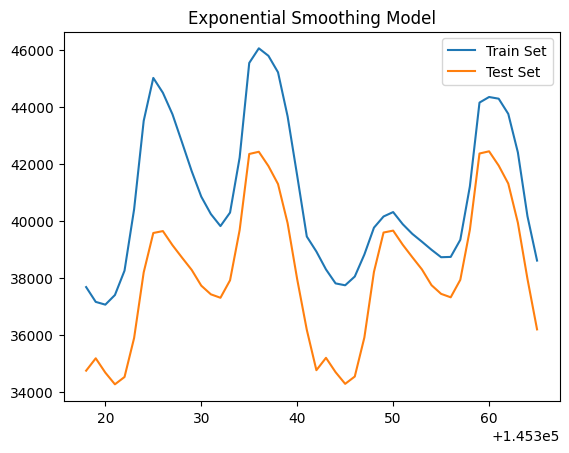

In [43]:
plt.figure()
# ExpModel.fittedvalues.plot()
plt.plot(test)
y_hat.plot()
plt.title('Exponential Smoothing Model')
plt.legend(['Train Set','Test Set','Holt-Winters'])

In [45]:
# y_hat = ExpModel.forecast(len(test))
MAPE = mape(test,y_hat)
RMSE = rmse(test,y_hat)
U = UStatistic(test.to_numpy(),y_hat.to_numpy())
dictResult= {   'Name': 'Holt-Winters',
                'RMSE': RMSE,
                'SMAPE': MAPE,
                'Theils U': U,
                }
Error_df = Error_df.append(dictResult,ignore_index=True)
Error_df.head()
# 'RMSE': '3025.9366', 'SMAPE': '6.73%'

/tmp/ipykernel_282627/2134328387.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Error_df = Error_df.append(dictResult,ignore_index=True)


,Name,RMSE,SMAPE,Theils U
0,Holt-Winters,3025.9366,6.73%,2.42192
1,Holt-Winters,3025.9366,6.73%,2.42192
